<a href="https://colab.research.google.com/github/charu13a/knowledge-games/blob/word2vec/CoOp_word2vec_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains an example of word2vec trained on a custom dataset (10 classic novels).

# Repository to train word2vec model on custom dataset.

## First we will read a document, which will serve as the training dataset.

Adding option to upload file.

In [0]:
from google.colab import files

uploaded = files.upload()
document = ""
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  document = document + "\n" + uploaded[fn].decode('UTF-8')

Saving huckleberry_finn.txt to huckleberry_finn.txt
Saving wizard_of_oz.txt to wizard_of_oz.txt
Saving gullivers_travels.txt to gullivers_travels.txt
Saving treasure_island.txt to treasure_island.txt
Saving peter_pan.txt to peter_pan (1).txt
Saving great_expectations.txt to great_expectations (2).txt
Saving sleepy_hollow.txt to sleepy_hollow (2).txt
Saving alice_in_wonderland.txt to alice_in_wonderland (4).txt
Saving tom_sawyer.txt to tom_sawyer (4).txt
Saving pride_and_prejudice.txt to pride_and_prejudice (7).txt
User uploaded file "huckleberry_finn.txt" with length 143115 bytes
User uploaded file "wizard_of_oz.txt" with length 227652 bytes
User uploaded file "gullivers_travels.txt" with length 550791 bytes
User uploaded file "treasure_island.txt" with length 272623 bytes
User uploaded file "peter_pan.txt" with length 284102 bytes
User uploaded file "great_expectations.txt" with length 320975 bytes
User uploaded file "sleepy_hollow.txt" with length 89466 bytes
User uploaded file "alic

## From string to tokenized document.

Let’s tokenize the documents.

In [0]:
from pprint import pprint  # pretty-printer
import nltk
nltk.download('punkt')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [0]:
import string

#removes punctuation from a sentence
def remove_punctuation(s):
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.replace('”', '')
  s = s.replace('“', '')
  s = s.replace('‘', '')
  return s.translate(table) 

In [0]:
tokenized_document = tokenizer.tokenize(document)
tokenized_document = list(map(remove_punctuation, tokenized_document))
# convert each word to lowercase
final_document = [line.lower().split() for line in tokenized_document]
# pprint(final_document)

## Training word2vec on our document.

1. Importing necessary modules.

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

2. Train model

In [0]:
# train model
model = Word2Vec(final_document, min_count=5, sg=1)
print(model)

Word2Vec(vocab=6640, size=100, alpha=0.025)


## Most Similar Words

In [0]:
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(result)

[('queen', 0.7912853360176086)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
result = model.most_similar(positive=['girl'], topn=1)
print(result)

[('woman', 0.902389645576477)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
result = model.most_similar(positive=['happy'], topn=1)
print(result)

[('grateful', 0.9269335269927979)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
result = model.most_similar(positive=['white'], topn=1)
print(result)

[('black', 0.921005129814148)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Visualizing Word Embedding using PCA

In [0]:
# adjust plot size
pyplot.rcParams['figure.figsize'] = [20, 20]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


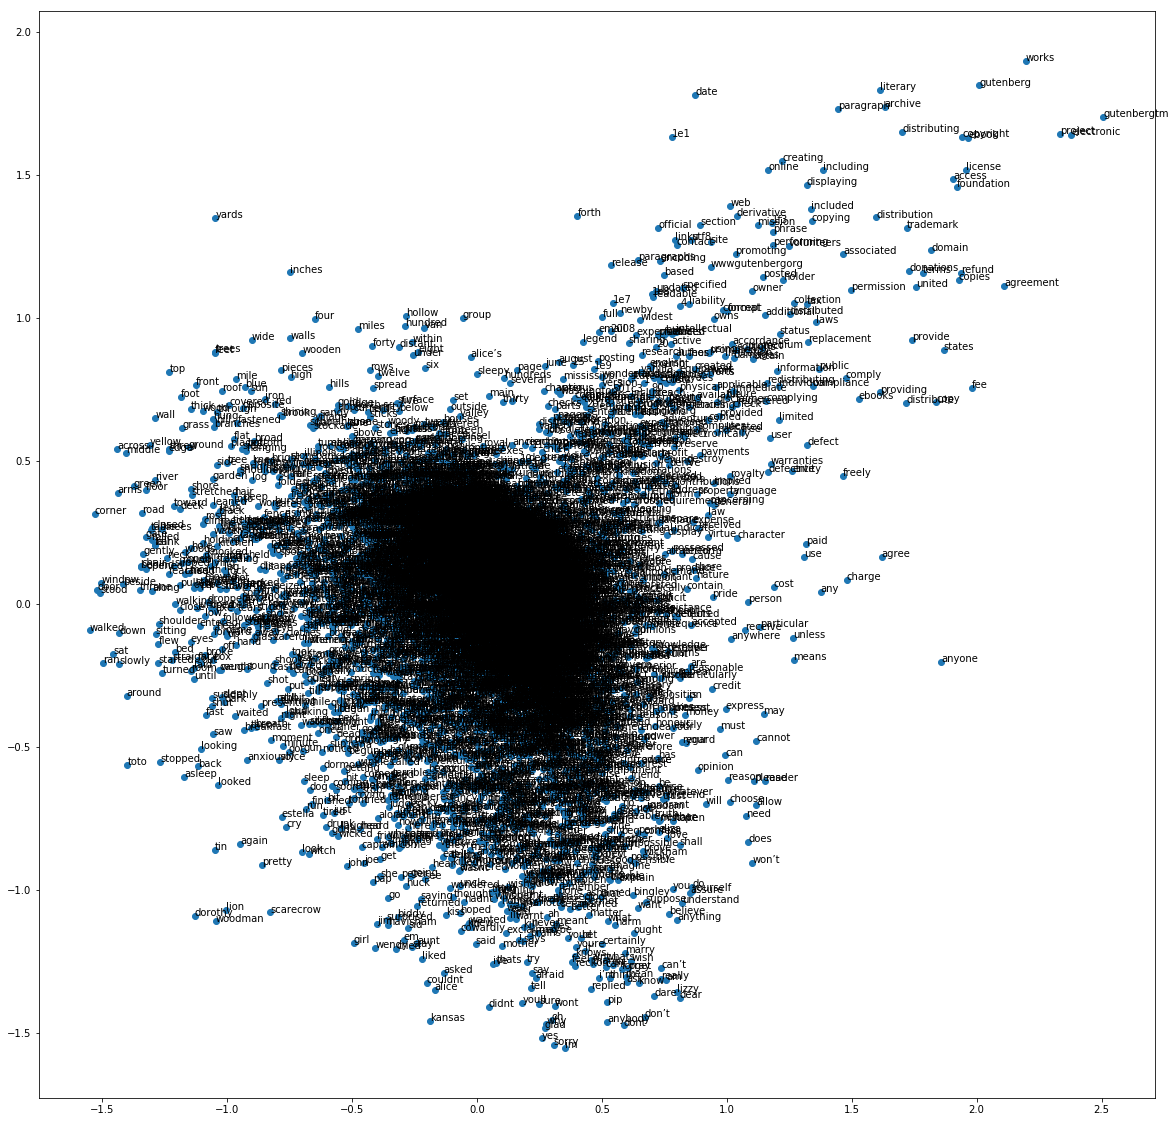

In [0]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()